In [308]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [309]:
from sklearn.linear_model import LinearRegression

In [315]:
df1 = pd.read_csv("giavang.csv")
df2 = pd.read_csv("giadau.csv")

### Kết hợp 2 dataset lại
   - Xóa đi các ngày không trùng nhau
   - Giữ lại bảng giá dầu cuối ngày và ghép 2 dataset
   - Chuyển các cột về đúng kiểu dữ liệu mong muốn

In [316]:
# Merge DataFrame a và b theo cột NgayThang
merged_df = pd.merge(df1, df2, on='Ngày', how='inner')
# Lọc các hàng chỉ thuộc DataFrame a
result_df1 = df1[df1['Ngày'].isin(merged_df['Ngày'])]
columns_to_drop = ["Ngày", "Mở", "Cao", "Thấp", "KL","% Thay đổi"]
df2 = df2.rename(columns={"Lần cuối" : "Giá dầu"})
result_df2 = df2[df2['Ngày'].isin(merged_df['Ngày'])].drop(columns=columns_to_drop ,axis=1)
result_df2 = result_df2.reset_index(drop=True)
result_df = pd.concat([result_df1,result_df2], axis=1)
result_df["Lần cuối"] = result_df["Lần cuối"].astype(str).str.replace(",","").astype(float)
# Nếu giá dầu bằng NaN thì lấy dữ liệu ngày trước đó
for i in range (0,len(result_df["Lần cuối"])):
    if (np.isnan(result_df["Giá dầu"][i])==True):
        result_df["Giá dầu"][i]=result_df["Giá dầu"][i-1]
# Chuyển cột Ngày sang kiểu DateTime
result_df["Ngày"] = pd.to_datetime(result_df["Ngày"],format='%d/%m/%Y')
result_df["Mở"] = result_df["Mở"].astype(str).str.replace(",","").astype(float)
result_df["Cao"] = result_df["Cao"].astype(str).str.replace(",","").astype(float)
result_df["Thấp"] = result_df["Thấp"].astype(str).str.replace(",","").astype(float)
result_df["% Thay đổi"] = result_df["% Thay đổi"].astype(str).str.replace("%","").astype(float)
result_df

C:\Users\ngduy\AppData\Local\Temp\ipykernel_1776\1533057764.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_df["Giá dầu"][i]=result_df["Giá dầu"][i-1]
C:\Users\ngduy\AppData\Local\Temp\ipykernel_1776\1533057764.py:14: SettingWith

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi,Giá dầu
0,2024-04-01,2250.36,2239.59,2265.86,2228.54,NaN,0.81,84.14
1,2024-03-28,2232.38,2194.19,2235.90,2187.33,NaN,1.75,83.44
2,2024-03-27,2194.02,2179.03,2197.71,2173.59,NaN,0.71,82.05
3,2024-03-26,2178.58,2171.82,2200.15,2167.75,NaN,0.33,81.61
4,2024-03-25,2171.45,2165.79,2181.30,2163.50,NaN,0.34,82.38
...,...,...,...,...,...,...,...,...
539,2022-03-04,1968.45,1935.65,1970.80,1929.78,NaN,1.72,110.52
540,2022-03-03,1935.21,1926.49,1941.47,1921.73,NaN,0.47,112.22
541,2022-03-02,1926.11,1943.69,1948.18,1913.82,NaN,-0.88,107.77
542,2022-03-01,1943.22,1908.19,1950.45,1900.93,NaN,1.85,107.77


In [317]:
# Quan sát sự ảnh hưởng giá vàng bởi giá dầu ngày hôm trước
a = result_df[["Lần cuối"]].head(100).astype(float)
b = result_df["Giá dầu"].iloc[1:101].astype(float)

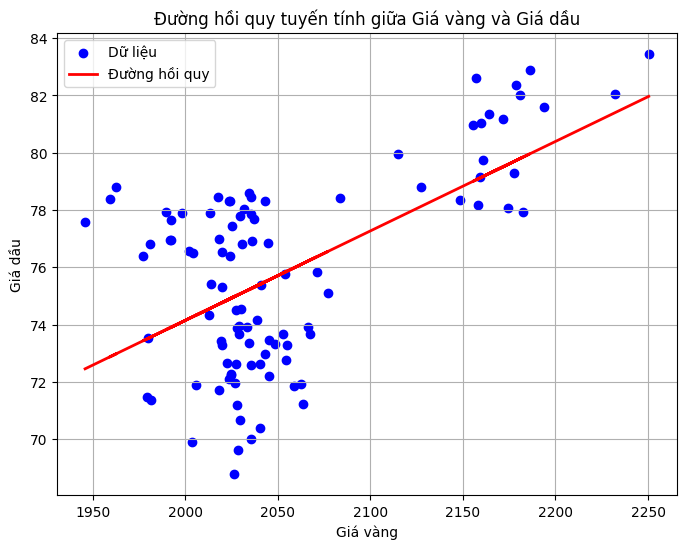

In [318]:
model = LinearRegression()

# Huấn luyện mô hình trên dữ liệu
model.fit(a, b)

# Dự đoán giá trị b dựa trên dữ liệu a
b_pred = model.predict(a)

# Vẽ biểu đồ dữ liệu và đường hồi quy tuyến tính
plt.figure(figsize=(8, 6))

plt.scatter(a, b, color='blue', label='Dữ liệu')  # Vẽ scatter plot của dữ liệu
plt.plot(a, b_pred, color='red', linewidth=2, label='Đường hồi quy')  # Vẽ đường hồi quy

plt.xlabel('Giá vàng')  # Đặt nhãn cho trục x
plt.ylabel('Giá dầu')  # Đặt nhãn cho trục y
plt.title('Đường hồi quy tuyến tính giữa Giá vàng và Giá dầu')  # Đặt tiêu đề của biểu đồ

plt.legend()  # Hiển thị chú thích

plt.grid(True)  # Hiển thị lưới

plt.show()  # Hiển thị biểu đồ

#### Các giá trị nằm gần đường hồi quy => giá vàng bị ảnh hưởng bởi giá dầu ngày hôm trước

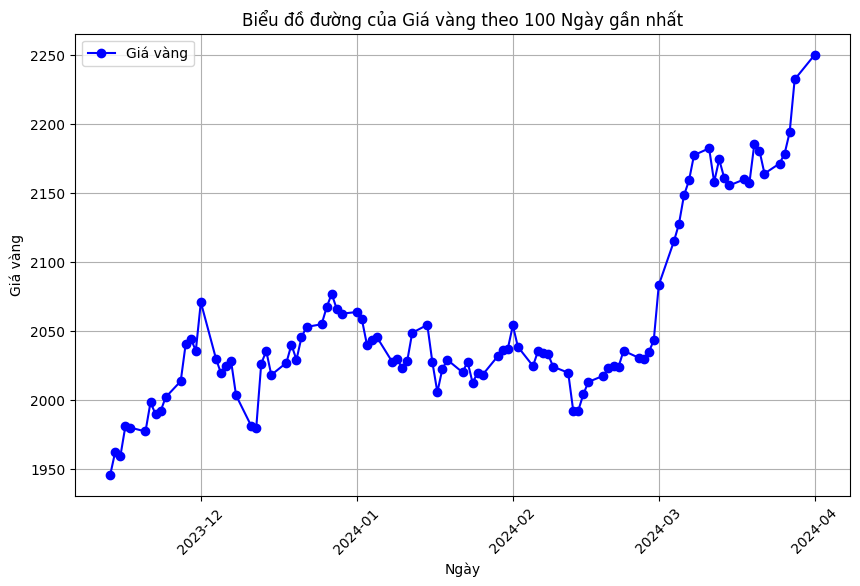

In [319]:
# Vẽ biểu đồ đường giá vàng trong 100 ngày gần nhất
plt.figure(figsize=(10, 6))  # Đặt kích thước của biểu đồ
result_df_100 = result_df.head(100)
plt.plot(result_df_100['Ngày'], result_df_100['Lần cuối'], marker='o', linestyle='-', color='b', label='Giá vàng')

# Đặt tên cho các trục và tiêu đề của biểu đồ
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.title('Biểu đồ đường của Giá vàng theo 100 Ngày gần nhất')

# Hiển thị chú thích (legend) của biểu đồ
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần thiết
plt.grid(True)  # Hiển thị lưới
plt.show()